Model Summary:



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4313 - loss: 0.9966 - val_accuracy: 0.8667 - val_loss: 0.8023
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7842 - loss: 0.7650 - val_accuracy: 0.9000 - val_loss: 0.6186
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7962 - loss: 0.6177 - val_accuracy: 0.9000 - val_loss: 0.4985
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8341 - loss: 0.5073 - val_accuracy: 0.9000 - val_loss: 0.4160
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8495 - loss: 0.4227 - val_accuracy: 0.9000 - val_loss: 0.3553

Test Accuracy: 90.00%


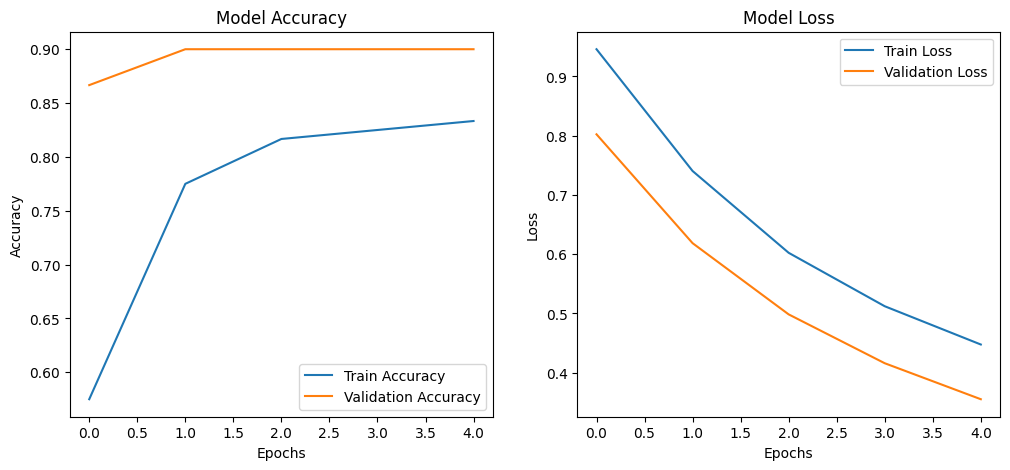

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

Sample Predictions (class probabilities):
 [[0.16397291 0.45319748 0.3828295 ]
 [0.9708672  0.01628382 0.01284894]
 [0.01674104 0.10810474 0.8751542 ]
 [0.17395179 0.37397277 0.45207545]
 [0.10438104 0.38696462 0.5086543 ]]

Predicted Classes:
 [1 0 2 2 2]
True Classes:
 [1 0 2 1 1]


In [ ]:
# -*- coding: utf-8 -*-
"""
Experiment: Implement Neural Network Model
"""

# 1. Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 2. Load and preprocess dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encoding of labels
y = to_categorical(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Build Neural Network Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 classes in Iris dataset

# 4. Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Model Summary
print("Model Summary:\n")
model.summary()

# 6. Train Model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=5,
                    batch_size=8,
                    verbose=1)

# 7. Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

# 8. Plot Training History
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")

plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# 9. Predictions
predictions = model.predict(X_test)
print("\nSample Predictions (class probabilities):\n", predictions[:5])
print("\nPredicted Classes:\n", np.argmax(predictions[:5], axis=1))
print("True Classes:\n", np.argmax(y_test[:5], axis=1))
